In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
names = ["marital_status", "num_children_at_home", "member_card", 
         "age", "year_income"]
data = []

with open("training.txt", "r") as f:
    for line in f.readlines():

        line = line.replace("{", "")
        line = line.replace("}", "")

        line = line.rstrip().split(",")
        datum = dict(zip(names, [None for _ in range(len(names))]))
        for block in line:
            block = block.split(" ")
            feat_name, feat_value = names[int(block[0])], block[1]
            datum[feat_name] = feat_value

        data.append(datum)

data[:2]

[{'marital_status': None,
  'num_children_at_home': '1',
  'member_card': None,
  'age': '39',
  'year_income': '100000'},
 {'marital_status': 'M',
  'num_children_at_home': None,
  'member_card': 'Gold',
  'age': '85',
  'year_income': '80000'}]

In [4]:
df = pd.DataFrame.from_dict(data)
df.isnull().sum()

marital_status          246
num_children_at_home    150
member_card             254
age                       0
year_income               0
dtype: int64

In [5]:
df["marital_status"].unique()

array([None, 'M'], dtype=object)

In [6]:
df["num_children_at_home"].value_counts()

num_children_at_home
1    185
2     81
3     55
4     13
5      7
Name: count, dtype: int64

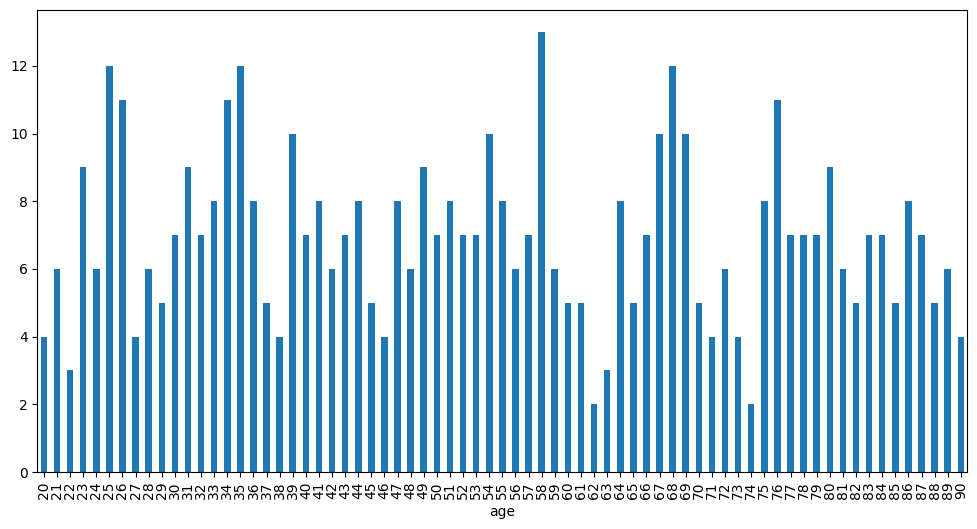

In [7]:
plt.figure(figsize=(12, 6))
df["age"].astype(int).value_counts().sort_index().plot(kind='bar')
plt.show()

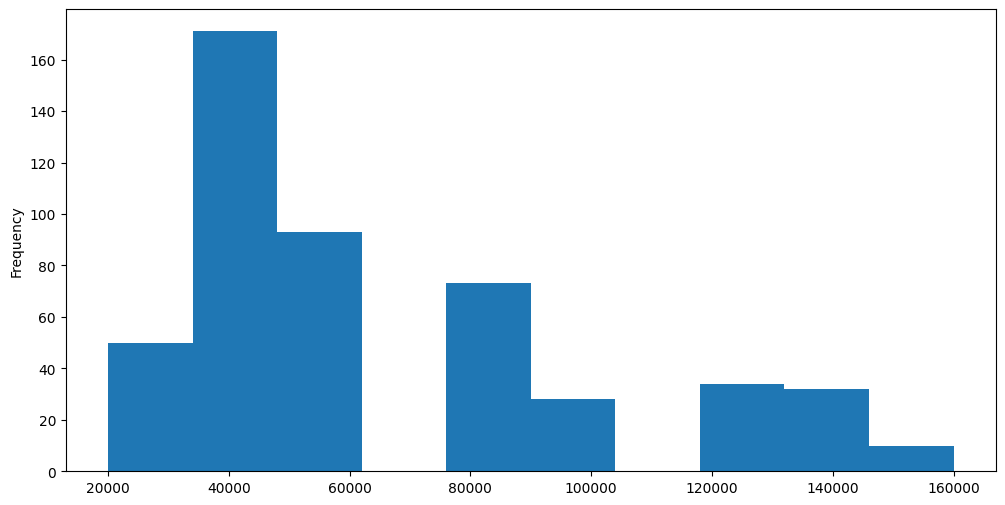

In [8]:
plt.figure(figsize=(12, 6))
df["year_income"].astype(float).plot(kind='hist')
plt.show()

In [9]:
df["year_income"].unique()

array(['100000', '80000', '20000', '40000', '60000', '120000', '160000',
       '140000'], dtype=object)

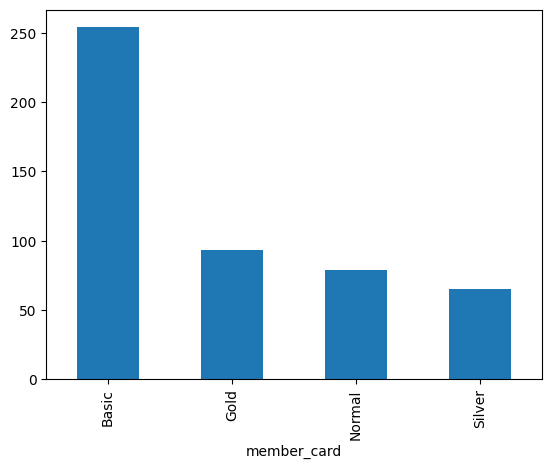

In [13]:
df["member_card"].fillna('Basic').value_counts().plot(kind='bar')
plt.show()

#### 填補缺失值

In [15]:
df["member_card"] = df["member_card"].fillna('Basic')
df["marital_status"] = df["marital_status"].fillna('S')
df["num_children_at_home"] = df["num_children_at_home"].fillna(0)

df.head()

,marital_status,num_children_at_home,member_card,age,year_income
0,S,1,Basic,39,100000
1,M,0,Gold,85,80000
2,M,1,Gold,90,20000
3,S,0,Normal,31,20000
4,M,0,Basic,49,40000


In [16]:
df["marital_status"] = df.marital_status.map({'M': 1, 'S': 0})
df["member_card"] = df["member_card"].map({
    "Basic": 0, "Normal": 1, "Silver": 2, "Gold": 3
})
df.head()

,marital_status,num_children_at_home,member_card,age,year_income
0,0,1,0,39,100000
1,1,0,3,85,80000
2,1,1,3,90,20000
3,0,0,1,31,20000
4,1,0,0,49,40000


In [17]:
df.corr()

,marital_status,num_children_at_home,member_card,age,year_income
marital_status,1.000000,0.049715,0.070379,-0.035513,-0.006482
num_children_at_home,0.049715,1.000000,0.387087,0.035633,0.017301
member_card,0.070379,0.387087,1.000000,-0.027868,0.036158
age,-0.035513,0.035633,-0.027868,1.000000,0.018499
year_income,-0.006482,0.017301,0.036158,0.018499,1.000000
